In [1]:
from reproducibility.reproducibility import *

## Cells experiment

In [2]:
proj = joblib.load(in_experiment_dir("statephate", "data/statephate_2pca.joblib")).transform

/home/ubuntu/anaconda3/envs/sb_paired/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator PCA from version 1.2.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


### Training

In [3]:
# AlignExperiment.run("--dataset=statephate  --h_dim=128  --n_layers=3  --n_epochs=30  --timestep_emb_dim=128  --in_dim=50 --out_dim=50  --diffusivity_schedule=constant  --max_diffusivity=1. --use_drift_in_doobs=True  --activation=silu").save("statephate_updated_x_t_same_size")

### Inference

In [4]:
statephate_debug = AlignExperiment.load("statephate_updated_x_t_same_size")

Args: {'data_dir': 'statephate', 'log_dir': 'statephate/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'pkzialojs', 'online': False, 'dataset': 'statephate', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 50, 'out_dim': 50, 'timestep_emb_dim': 128, 'h_dim': 128, 'n_layers': 3, 'activation': 'silu', 'dropout_p': 0.1, 'n_epochs': 30, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 1.0, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 'early_stop_goal': 'min'}


In [7]:
# statephate_debug.export_drift(".", "statephate_sb_align_drift")

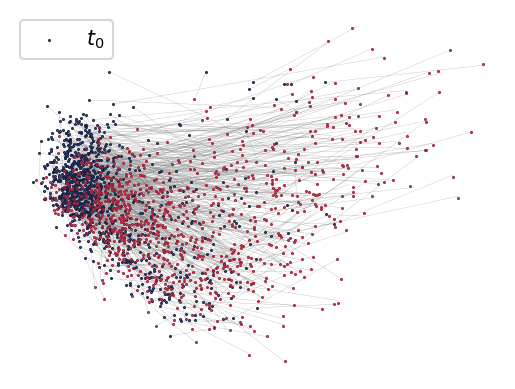

In [6]:
plt.axis("off")
# plot_marginals(statephate_debug.get_marginals(mode="train"), projection=proj)

statephate_sampled = statephate_debug.sample(mode="train", samples_num=1000, trials_num=1)
plot_matchings(*statephate_sampled[[0,-1]], proj)
plot_multiple_marginals(statephate_sampled, projection=proj, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)

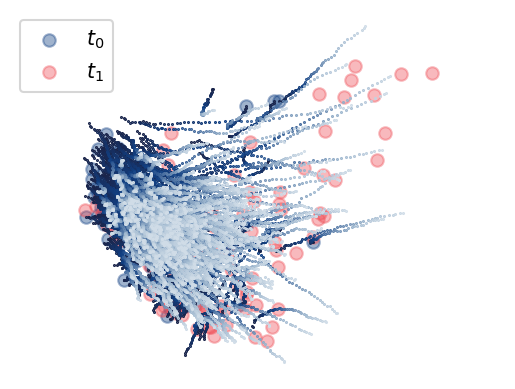

In [8]:
plt.axis('off');
plt.axis("equal")
plot_marginals(statephate_debug.get_marginals(mode="train", samples_num=100), projection=proj)
plot_multiple_marginals(statephate_debug.sample(mode="train", trials_num=10), skip_step=2, projection=proj)

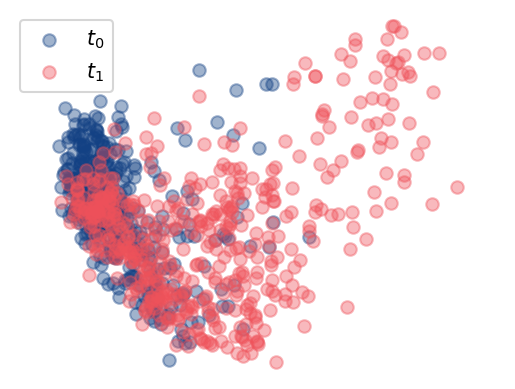

In [9]:
plt.axis("off")
plot_marginals(statephate_debug.get_marginals(mode="train"), projection=proj)

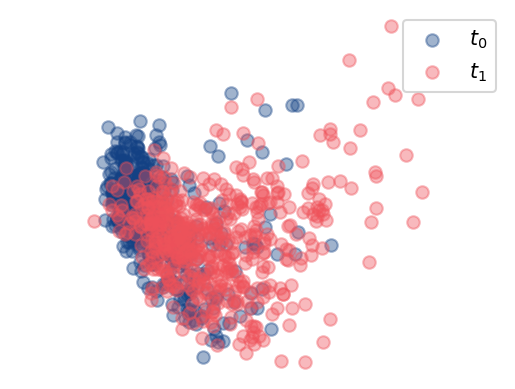

In [10]:
plt.axis("off")
plot_marginals(dict(zip(["initial", "final"], statephate_debug.sample(mode="train", samples_num=500, trials_num=2)[[0,-1]])), projection=proj)

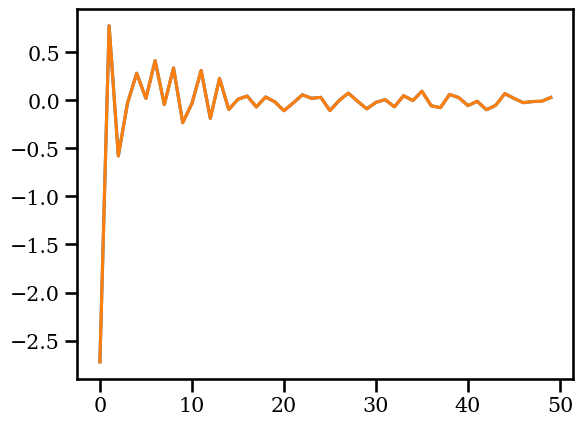

In [11]:
plt.plot(statephate_debug.get_marginals(mode="train")['initial'].mean(axis=0))
plt.plot(statephate_debug.sample(mode="train", samples_num=500)[0].mean(axis=0));

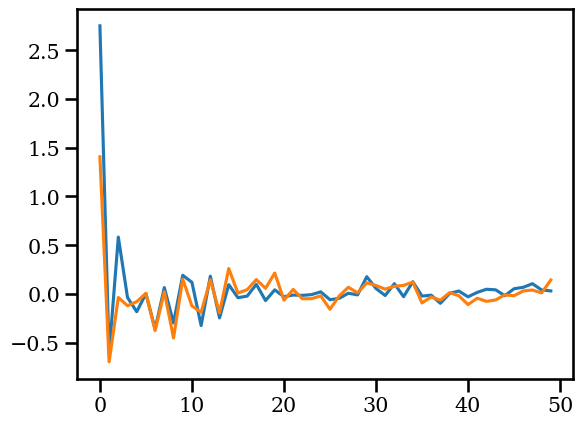

In [12]:
plt.plot(statephate_debug.get_marginals(mode="train")['final'].mean(axis=0))
plt.plot(statephate_debug.sample(mode="train", samples_num=500)[-1].mean(axis=0));

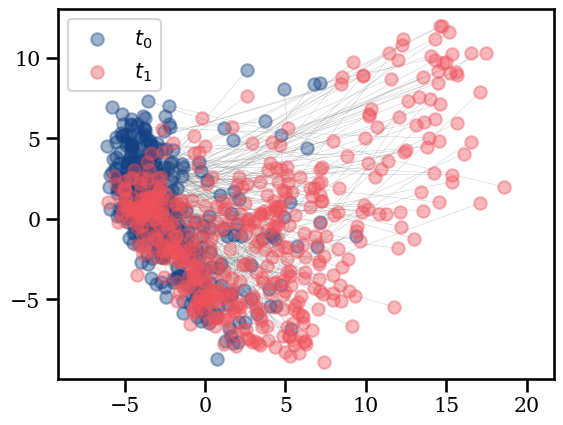

In [13]:
plot_marginals(statephate_debug.get_marginals(mode="train"), projection=proj)
plot_matchings(*statephate_debug.get_marginals(mode="train").values(), projection=proj)

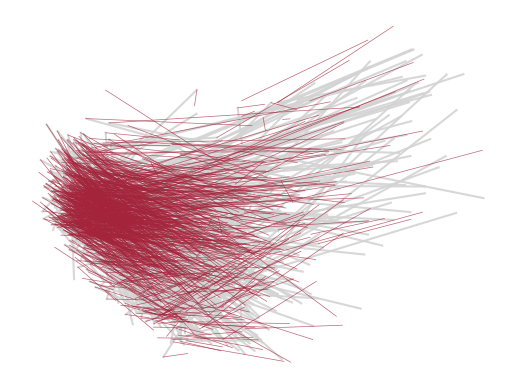

In [14]:
plt.axis("off")
plot_matchings(*statephate_debug.get_marginals(mode="train").values(), projection=proj, lw=1.5, alpha=.9, color="lightgray")
plot_matchings(*statephate_debug.sample(mode="train", samples_num=1000, trials_num=50)[[0,-1]], projection=proj, color=palette[-1], lw=.5)

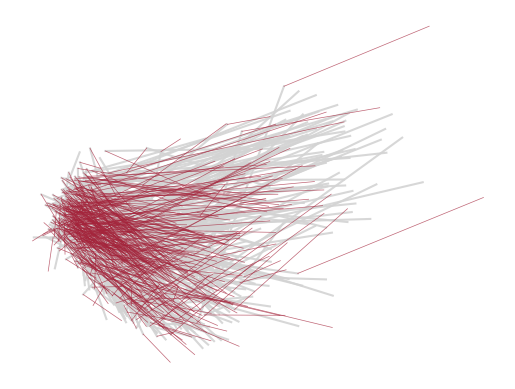

In [15]:
plt.axis("off")
plot_matchings(*statephate_debug.get_marginals(mode="test").values(), projection=proj, lw=1.5, alpha=.9, color="lightgray")
plot_matchings(*statephate_debug.sample(mode="test", samples_num=1000, trials_num=1)[[0,-1]], projection=proj, color=palette[-1], lw=.5)

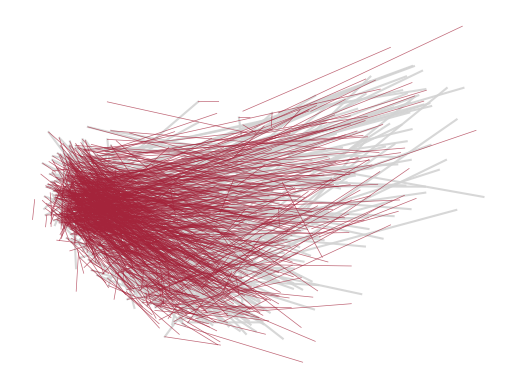

In [16]:
plt.axis("off")
plot_matchings(*statephate_debug.get_marginals(mode="train").values(), projection=proj, lw=1.5, alpha=.9, color="lightgray")
plot_matchings(*statephate_debug.sample(mode="train", samples_num=1000, trials_num=1)[[0,-1]], projection=proj, color=palette[-1], lw=.5)

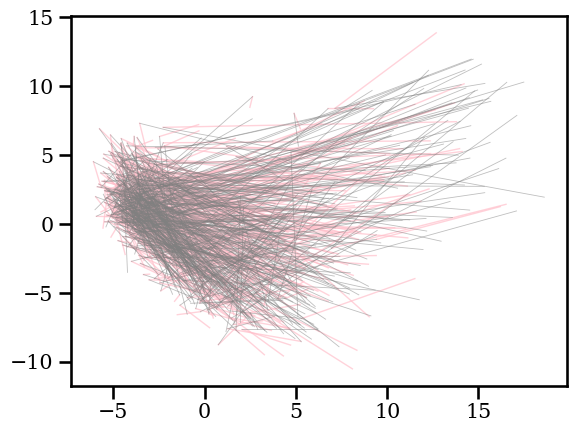

In [17]:
plot_matchings(*statephate_debug.sample(mode="train", samples_num=500)[[0,-1]], projection=proj, color="pink", lw=1.)
plot_matchings(*statephate_debug.get_marginals(mode="train").values(), projection=proj, lw=.6, alpha=.5)

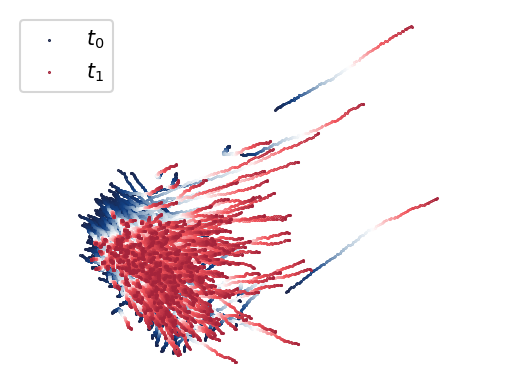

In [18]:
plt.axis('off');
plt.axis("equal")
plot_multiple_marginals(statephate_debug.sample(mode="test", trials_num=10), skip_step=1, labels=[r"$t_0$", r"$t_1$"], projection=proj)
export_fig("fig_sb_align_statefate_trajs")

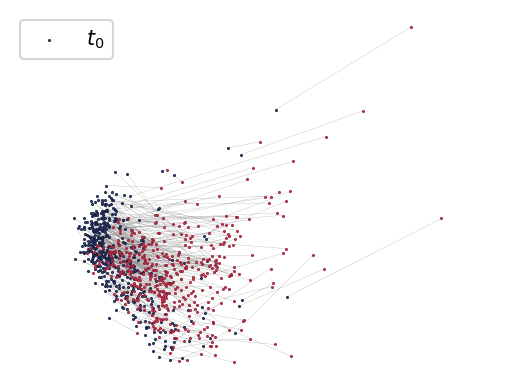

In [20]:
plt.axis("off")
plt.axis("equal")
cell_sampled = statephate_debug.sample(mode="test", samples_num=1000, trials_num=10)
plot_multiple_marginals(cell_sampled, skip_step=99, labels=[r"$t_0$", r"$t_1$"], projection=proj)
plot_matchings(*cell_sampled[[0,-1]], projection=proj)
export_fig("fig_sb_align_statefate_match")

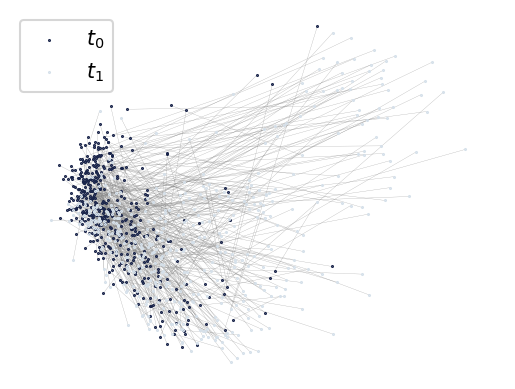

In [21]:
plt.axis("off")
plt.axis("equal")
cell_sampled_true = statephate_debug.get_marginals(mode="test", samples_num=1000)
plot_multiple_marginals(np.stack([cell_sampled_true['initial'], cell_sampled_true['final']]), skip_step=1, labels=[r"$t_0$", r"$t_1$"], projection=proj)
plot_matchings(*cell_sampled_true.values(), projection=proj)
export_fig("fig_sb_align_statefate_match_ground_truth")

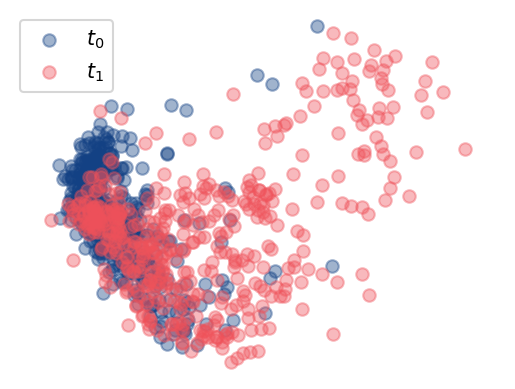

In [22]:
plt.axis("off")
plt.axis("equal")
plot_marginals(statephate_debug.get_marginals(mode="test"), projection=proj)
cell_marg_xlim, cell_marg_ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
export_fig("fig_sb_align_statefate_true_marginals")

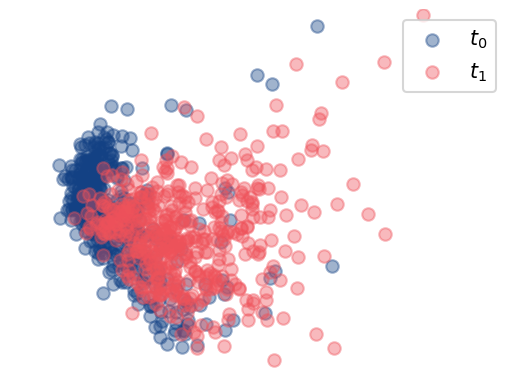

In [23]:
plt.axis("off")
plt.axis("equal")
plot_marginals(dict(zip(["initial", "final"], statephate_debug.sample(mode="test", samples_num=1200, trials_num=10)[[0,-1]])), projection=proj)
plt.gca().set_xlim(*cell_marg_xlim)
plt.gca().set_ylim(*cell_marg_ylim)
export_fig("fig_sb_align_statefate_pred_marginals")

In [24]:
def mmd_distance(x, y, gamma):
    xx = rbf_kernel(x, x, gamma)
    xy = rbf_kernel(x, y, gamma)
    yy = rbf_kernel(y, y, gamma)

    return xx.mean() + yy.mean() - 2 * xy.mean()


def compute_scalar_mmd(target, transport, gammas=None):
    if gammas is None:
        gammas = [2, 1, 0.5, 0.1, 0.01, 0.005]

    def safe_mmd(*args):
        try:
            mmd = mmd_distance(*args)
        except ValueError:
            mmd = np.nan
        return mmd

    return np.mean(list(map(lambda x: safe_mmd(target, transport, x), gammas)))

def square_norm(vec):
    return np.square(vec).sum(axis=-1)

def compute_rmsd(target, predicted):
    return np.sqrt(square_norm(target-predicted).mean(axis=0))

def compute_norm_rmsd(target, predicted):
    return compute_rmsd(target, predicted) / (np.sqrt(square_norm(target).max()) - np.sqrt(square_norm(target).min()))

# def compute_l2_difference(target, predicted):
#     return np.sqrt(square_norm(target-predicted)).mean(axis=0)

def compute_l2_difference(target, predicted):
    return np.sqrt(square_norm(target.mean(axis=0) - predicted.mean(axis=0)))

In [27]:
cat_codes = pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_train.csv"))['annotation'].astype('category').cat.codes

In [31]:
knn_train_y = np.concatenate([pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_initial_train.csv"))['annotation'].to_numpy(), pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_train.csv"))['annotation'].to_numpy()], axis=0)
knn_train_X = np.concatenate([np.load(t0_points_path("statephate", mode="train")), np.load(t1_points_path("statephate", mode="train"))], axis=0)

#### Train classifier

In [30]:
# # TRAIN cell_type predictor
# from sklearn.neural_network import MLPClassifier
# knn = MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic', alpha=.1, learning_rate='adaptive')

# knn.fit(knn_train_X, knn_train_y)

# joblib.dump(knn, in_experiment_dir("statephate", "data", "statephate_cell_type_predictor.joblib"))

#### Use classifier

In [32]:
# # LOAD cell_type predictor
knn = joblib.load(in_experiment_dir("statephate", "data", "statephate_cell_type_predictor.joblib"))

def compute_cell_type_score(target_labels, predicted_embs, projection=lambda x: x):
    pred_labels = knn.predict(projection(predicted_embs))
    return accuracy_score(target_labels, pred_labels)

In [33]:
compute_cell_type_score(knn_train_y, knn_train_X)

0.9813829787234043

In [34]:
compute_cell_type_score(
    pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_test.csv"))['annotation'].to_numpy(),
    np.load(t1_points_path("statephate", mode="test"))
)

0.910828025477707

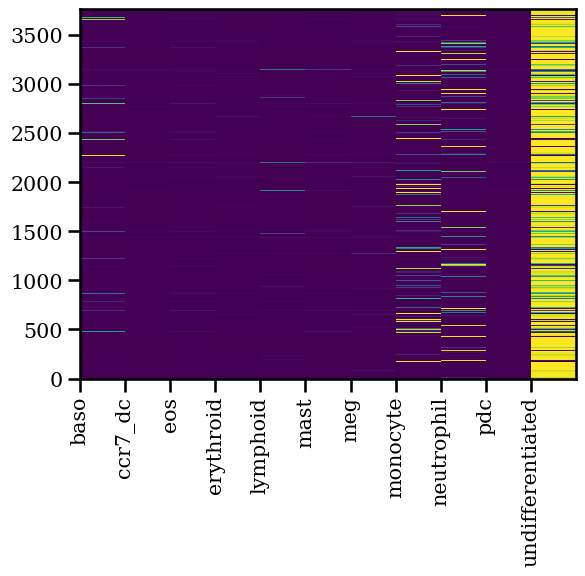

In [35]:
plt.pcolormesh(knn.predict_proba(statephate_debug.sample(mode="train", samples_num=3760, trials_num=2)[-1]))
plt.xticks(range(11), knn.classes_, rotation=90);

In [37]:
print("Classifier performance on training set:")
compute_cell_type_score(knn_train_y[-3760:], statephate_debug.sample(mode="train", samples_num=3760, trials_num=2)[-1])

Classifier performance on training set:


0.5531914893617021

In [38]:
def compute_metrics(target, predicted, cell_types=None):
    metrics = {
        'mmd': compute_scalar_mmd(target, predicted),
        'norm_rmsd': compute_norm_rmsd(target, predicted).item(),
        'l2': compute_l2_difference(target, predicted).item(),
    }

    if cell_types is not None:
        metrics['cell_type'] = compute_cell_type_score(cell_types, predicted)

    return metrics

Train set performances

In [39]:
compute_metrics(statephate_debug.get_marginals(mode="train")['final'], statephate_debug.sample(mode="train", samples_num=500, trials_num=2)[-1])

{'mmd': 0.005551732165665509,
 'norm_rmsd': 0.9397394211845749,
 'l2': 1.4964429241013957}

In [41]:
# Train set performance
print("Train set performance")
train_cell_types = pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_train.csv"))[:500]['annotation']
compute_metrics(statephate_debug.get_marginals(mode="train")['final'], statephate_debug.sample(mode="train", samples_num=500, trials_num=30)[-1], cell_types=train_cell_types)

Train set performance


{'mmd': 0.010693742623996296,
 'norm_rmsd': 0.8848009421246097,
 'l2': 1.4903283118616935,
 'cell_type': 0.592}

Test set performances

In [42]:
compute_metrics(statephate_debug.get_marginals(mode="test")['final'], statephate_debug.sample(mode="test", samples_num=500, trials_num=2)[-1])

{'mmd': 0.00604142272593713,
 'norm_rmsd': 0.9752625339603417,
 'l2': 1.3369779234884547}

In [43]:
# Test set performance
print("Test set performance")
test_cell_types = pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_test.csv"))[:558]['annotation']
compute_metrics(statephate_debug.get_marginals(mode="test", samples_num=558)['final'], statephate_debug.sample(mode="test", samples_num=558, trials_num=20)[-1], cell_types=test_cell_types)

Test set performance


{'mmd': 0.010641045272402963,
 'norm_rmsd': 0.9204984607675617,
 'l2': 1.2319526694743044,
 'cell_type': 0.5605095541401274}

Repeat measurements several times

In [48]:
test_cell_types = pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_final_test.csv"))[:558]['annotation']

run_results = []

for run in range(10):
    run_trajs = statephate_debug.sample(mode="test", samples_num=558, trials_num=20)
    np.save(f"results/sb-align_test_trajs_{run}.npy", run_trajs)
    run_results.append(compute_metrics(statephate_debug.get_marginals(mode="test", samples_num=558)['final'], run_trajs[-1], cell_types=test_cell_types))

run_results = pd.DataFrame(run_results)

run_results.to_csv("results/cells_runs_performance.csv")

In [49]:
run_results = pd.read_csv("results/cells_runs_performance.csv", index_col=0)
run_results

,mmd,norm_rmsd,l2,cell_type
0,0.010686,0.921592,1.250562,0.558386
1,0.010677,0.922157,1.248324,0.564756
2,0.010598,0.920791,1.228937,0.556263
3,0.010814,0.919956,1.250689,0.558386
4,0.010419,0.922759,1.221987,0.552017
5,0.010638,0.922017,1.255485,0.573248
6,0.010627,0.921597,1.262141,0.566879
7,0.010653,0.919544,1.224798,0.566879
8,0.010776,0.919246,1.262489,0.566879
9,0.010689,0.919575,1.289483,0.569002


In [50]:
# Compute statistics
pd.DataFrame(run_results.apply(lambda x: {"mean": x.mean(), "std": x.std()}).to_dict())

,mmd,norm_rmsd,l2,cell_type
mean,0.010658,0.920924,1.249489,0.563270
std,0.000107,0.001268,0.020431,0.006643


#### Plot cell types

(-10.126398079712953, 13.761092370070184)

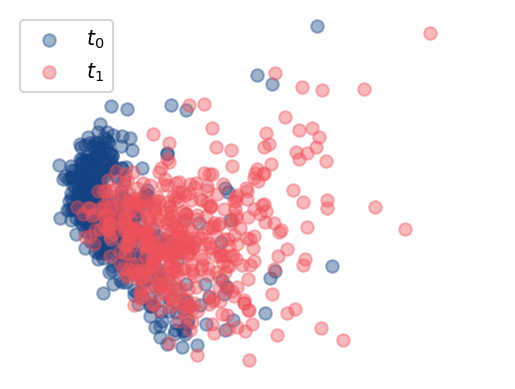

In [51]:
plt.axis("off")
plt.axis("equal")
plot_marginals(dict(zip(["initial", "final"], statephate_debug.sample(mode="test", samples_num=1200, trials_num=10)[[0,-1]])), projection=proj)
plt.gca().set_xlim(*cell_marg_xlim)
plt.gca().set_ylim(*cell_marg_ylim)
# export_fig("fig_sb_align_statefate_pred_marginals", True)

In [52]:
test_embs_preds = statephate_debug.sample(mode="test", samples_num=1200, trials_num=10)[-1]
test_cell_type_preds = knn.predict(test_embs_preds)

In [53]:
test_cell_type_true = test_cell_types

Initial types of cells

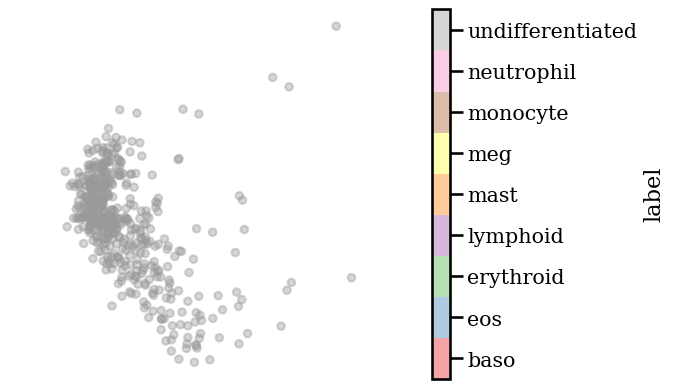

In [55]:
test_cells_results = pd.DataFrame([np.concatenate([pd.read_csv(in_experiment_dir("statephate", "data", "statephate_infos_initial_test.csv"))[:558]['annotation'], test_cell_type_true])] + list(proj(np.concatenate([statephate_debug.get_marginals(mode='test')['initial'], test_embs_preds])).T), index=['label', 'x', 'y']).T
# cell_type_cat = pd.CategoricalDtype(test_cells_results['label'].unique().sort(), ordered=True)
test_cells_results['label'] = test_cells_results['label'].astype('category')
test_cells_results = test_cells_results.loc[:471]
test_cells_results.plot.scatter('x', 'y', c='label', cmap=plt.cm.Set1, alpha=.4, s=30)
plt.axis("off")
plt.axis("equal");
export_fig("fig_sb_align_statefate_initial_true_types")

True final types of cells

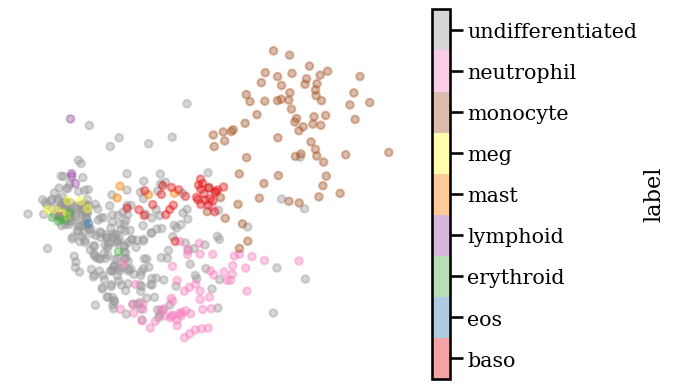

In [56]:
test_cells_results = pd.DataFrame([np.concatenate([test_cell_type_true, test_cell_type_preds])] + list(proj(np.concatenate([statephate_debug.get_marginals(mode='test')['final'], test_embs_preds])).T), index=['label', 'x', 'y']).T
test_cells_results['label'] = test_cells_results['label'].astype('category')
test_cells_results = test_cells_results.loc[:471].reset_index()
test_cells_results = test_cells_results.loc[np.argsort(test_cells_results['label'])[::-1].to_numpy()]
test_cells_results.plot.scatter('x', 'y', c='label', cmap=plt.cm.Set1, alpha=.4, s=30)
plt.axis("off")
plt.axis("equal");
export_fig("fig_sb_align_statefate_final_true_types")

Predicted final types of cells

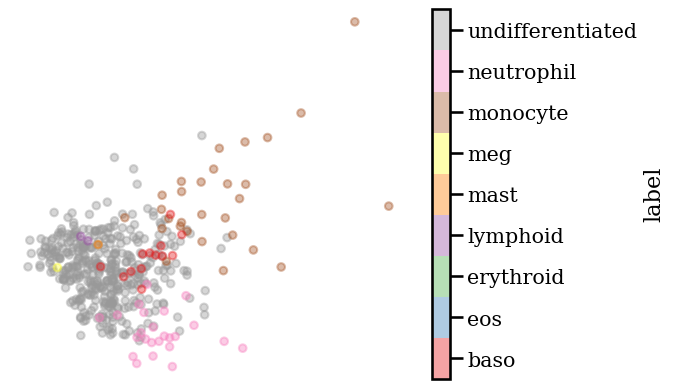

In [57]:
test_cells_results = pd.DataFrame([np.concatenate([test_cell_type_true, test_cell_type_preds])] + list(proj(np.concatenate([statephate_debug.get_marginals(mode='test')['final'], test_embs_preds])).T), index=['label', 'x', 'y']).T
# cell_type_cat = pd.CategoricalDtype(test_cells_results['label'].unique().sort(), ordered=True)
test_cells_results['label'] = test_cells_results['label'].astype('category')
test_cells_results = test_cells_results.loc[471:].reset_index()
test_cells_results = test_cells_results.loc[np.argsort(test_cells_results['label'])[::-1].to_numpy()]
test_cells_results.plot.scatter('x', 'y', c='label', cmap=plt.cm.Set1, alpha=.4, s=30)
plt.axis("off")
plt.axis("equal");
export_fig("fig_sb_align_statefate_final_preds_types")

In [61]:
test_embs_baseline = np.load(in_experiment_dir("statephate", "data", "statephate_test_final_sb_baseline_preds.npy"))
test_cell_type_baseline_preds = knn.predict(test_embs_baseline)

In [62]:
np.mean(test_cell_type_baseline_preds == test_cell_type_true)

0.5668789808917197

Predicted final types of cells (baseline)

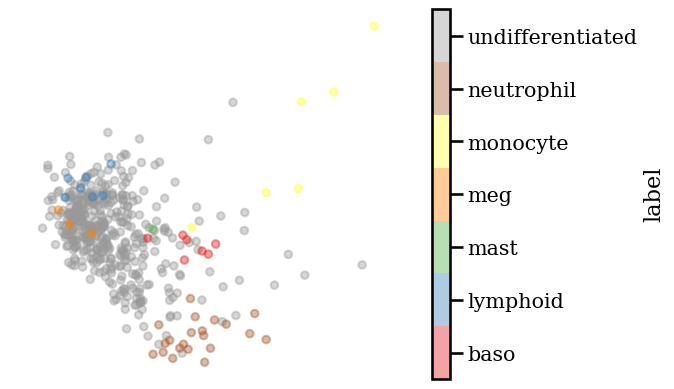

In [63]:
test_cells_results = pd.DataFrame([np.concatenate([test_cell_type_baseline_preds, test_cell_type_preds])] + list(proj(np.concatenate([test_embs_baseline, test_embs_preds])).T), index=['label', 'x', 'y']).T
# cell_type_cat = pd.CategoricalDtype(test_cells_results['label'].unique().sort(), ordered=True)
test_cells_results['label'] = test_cells_results['label'].astype('category')
test_cells_results = test_cells_results.loc[:471].reset_index()
test_cells_results = test_cells_results.loc[np.argsort(test_cells_results['label'])[::-1].to_numpy()]
test_cells_results.plot.scatter('x', 'y', c='label', cmap=plt.cm.Set1, alpha=.4, s=30)
plt.axis("off")
plt.axis("equal");
export_fig("fig_baseline_statefate_final_preds_types")

### Miscellaneous

In [64]:
# Hyperparameter search snippet

# from ray import tune

# def objective(hparams):
#     experiment = AlignExperiment.run(f"--dataset=statephate  --h_dim=64  --n_layers=4  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --in_dim=50 --out_dim=50  --diffusivity_schedule=constant  --max_diffusivity={hparams['max_diffusivity']} --use_drift_in_doobs=True  --activation={hparams['activation']}")
    
#     scores = compute_metrics(experiment.get_marginals(mode="train")['final'], experiment.sample(mode="train", samples_num=500)[-1])

#     return {'score': scores['mmd']}

# search_space = {
#     "activation": tune.choice(["leaky_relu", "relu", "selu"]),
#     # "activation": tune.choice(["selu"]),
#     "max_diffusivity": tune.grid_search([.01, .1, .8, 1., 1.2, 2., 5.]),
#     # "max_diffusivity": tune.grid_search([1., 2., 5., 10.]),
# }

# tuner = tune.Tuner(tune.with_resources(objective, {'cpu': 1., 'gpu': .2}), param_space=search_space)

# results = tuner.fit()

# results.get_best_result(metric="score", mode="min").config